## Module 1: Global Geochemistry of Mid-Ocean Ridge Basalts (MORB)

In [1]:
""" Created on February 19, 2023 // @author: Sarah Shi, converted Kent Ratajeski's SERC modules to Python and added content """

" Created on February 19, 2023 // @author: Sarah Shi, converted Kent Ratajeski's SERC modules to Python and added content "

Geological processes at the mid-ocean ridges are responsible for the bulk of the Earth's heat loss and volcanic activity. The compositions of materials erupted at these locations, dominantly mid-ocean ridge basalts (MORBs), have profound implications for the inner workings of the Earth's mantle, the construction of oceanic crust, and global plate tectonics. In this exercise, students replicate a portion of a classic paper on MORB geochemistry [(Klein and Langmuir, 1987)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/JB092iB08p08089), but using a much larger global geochemical dataset downloaded from the PetDB database. Through a series of activities and questions, students are encouraged to think about the petrologic and geodynamic processes controlling the composition of Earth's most abundant volcanic rocks.

## I. Introduction

#### Exploring and sampling the world's mid-ocean ridges

Since the mid-20th century, our knowledge of undersea volcanic activity has expanded considerably as portions of the Earth's seafloor have been systematically explored. Dedicated scientific research vessels have obtained thousands of samples of oceanic crust by dredging, drilling, and small submersibles. These samples have been cataloged, analyzed, stored in large archives, and the resulting data has been published widely in the geological literature, contributing to our knowledge of the composition and origin of the oceanic crust. A large amount of these data are now available in digital format from the Petrological Database of the Ocean Floor ([PetDB](https://search.earthchem.org/)), a web-based data management system for geochemical and petrological sample-based data funded by the National Science Foundation.

#### Mid-ocean ridge basalts: the Earth's most voluminous volcanic rocks 

On a volumetric basis, basaltic lavas erupted under the ocean at mid-ocean ridges are the most important products of terrestrial volcanism. What we have learned from mid-ocean basalts (MORBs) has had tremendous implications for our understanding of large-scale geodynamic and tectonic processes operating within the Earth's core, mantle, and crust.

When studying a group of related igneous rocks, an important issue to ascertain is the amount of compositional variation that characterizes the dataset. This is of particular importance for the study of MORB's. Are MORBs relatively uniform in composition, perhaps suggesting partial melting from uniform source materials in the mantle followed by uniform modification by magmatic processes? Alternatively, does the global MORB dataset exhibit significant compositional variation, perhaps suggesting important differences in source materials, melting conditions, or subsequent magmatic processes? A related issue is whether geochemical variation in the MORB dataset is a function of geographic location (e.g., position along the mid-ocean ridge system). This may have important implications for lateral variations in composition, temperature, or pressure within the Earth's mantle. Keep these larger issues in mind as you work through the following exercise.


### II. Accessing global datasets with simple coding (or Excel). 

### What am I looking at here? ###
This is a Jupyter Notebook, a document in a web browser that you can edit, generate text, and run code (typically Python). You may have previously seen or used a Jupyter Notebook for courses such as UN3400: Computational Earth Science. In this particalur case, to help the code run smoothly, we are doing the processing in the cloud using a tool called Google Colab. This means that you should be able to access all of the packages required and execute the code independent of the details of the computer that you are using locally - all you need is access to an internet connection and a web browser.


### Online Big Data - Bathymetry and MORB compositions ###
A key feature of modern earth and environmental sciences is that huge observational, experimental and thermodynamic datasets are now available. The IEDA2 data infrastructures hosts obseravtional datasets with EarthChem and experimental and thermodynamic datasets with LEPR/TraceDs (Library of Experimental Phase Relations/Trace element Distribution experimental database). Tools like Python allow for increased interaction with these datasets. In this practical we will look at one MORB dataset, which you can find on [PetDB](https://ecl.earthchem.org/view.php?id=274). You can click on the links to understand the data sources. 


### NumPy for simple maths, Pandas for data-tables, and GMT for mapping ###
We will explore simple chemical relationships in the geochemical data using [Numpy](https://numpy.org/) to perform simple mathematical calculations and using [Pandas](https://pandas.pydata.org/) to read in data. We will additionally use the [Generic Mapping Tools (GMT)](https://www.generic-mapping-tools.org/) package, which is now available in Python, to produce maps and examine mid-ocean ridge bathmetry. GMT is widely used in the Earth and Marine Sciences. 

I'll put a couple of cells of code in below, which you should run, in order to import the correct packages and bathymetry data for use in the practical. 


In [2]:
import numpy as np
import pandas as pd
!pip install pygmt
import pygmt
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import rc
rc('font',**{'size': 14})

### III. Analyze the data. 

##### 1. Open the file you have just downloaded in Excel. Notice the huge amount of data! This is only a subset of the MORB samples available on PetDB. Those marine geologists have definitely been busy!

In [3]:
# Read in the datasets here with the Pandas package. We are storing the data as a dataframe, which is a 2D labeled data structure, like a 2D array or table with rows and columns. 

df = pd.read_csv('ClassandLehnertMORB.csv')

In [4]:
# Visualize the dataset by calling the first 5 rows of data. What information is available?

df.head()

,Sample_ID,Material,SiO2,TiO2,Al2O3,FeO,Cr2O3,MnO,MgO,CaO,...,Longitude,Elevation,Tectonic,Rock,Expedition,Reference,Method,Sample_ID.1,Material.1,Elevation_km
0,SHK0462-006,WR,45.31,1.34,16.04,10.91,NaN,0.16,6.44,11.22,...,57.30,NaN,FRACTURE_ZONE,"IVM, igneous:volcanic:mafic",SHINKAI 6500 D462,"COOGAN, 2004",NaN,SHK0462-006,WR,NaN
1,HLY0102-005-002,GL,46.42,2.85,15.55,12.68,NaN,NaN,7.38,10.03,...,2.12,-4098.5,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",HEALY 0102,"MICHAEL, 2003; GOLDSTEIN, 2008",DCP; TIMS; EMP; ICPMS,HLY0102-005-002,GL,-4.0985
2,HLY0102-028-015,GL,46.81,NaN,NaN,NaN,NaN,NaN,8.67,NaN,...,2.66,-4075.0,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",HEALY 0102,"GOLDSTEIN, 2008",TIMS; EMP; ICPMS,HLY0102-028-015,GL,-4.0750
3,JCR0031-ROPOS-434-1A,WR,46.84,1.68,15.99,10.74,NaN,0.16,6.10,11.45,...,57.28,NaN,FRACTURE_ZONE,"IVM, igneous:volcanic:mafic",JR31,"COOGAN, 2004",NaN,JCR0031-ROPOS-434-1A,WR,NaN
4,END0113-004-001,GL,47.29,1.39,16.59,11.23,NaN,0.18,10.59,10.24,...,-112.76,-2520.0,SPREADING_CENTER,,EN113,"HANAN, 1989; SCHILLING, 1985; FONTIGNIE, 1991;...",MS; EMP; ICPMS; MS-ID,END0113-004-001,GL,-2.5200


In [5]:
# We can print all column names to understand what is available by calling: 

df.columns


Index(['Sample_ID', 'Material', 'SiO2', 'TiO2', 'Al2O3', 'FeO', 'Cr2O3', 'MnO',
       'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'LOI', '87Sr/86Sr', '143Nd/144Nd',
       'epsilon Nd', '206Pb/204Pb', '207Pb/204Pb', '208Pb/204Pb',
       '176Hf/177Hf', 'epsilon Hf', 'He', '3He', '4He', '3He/4He', '4He/3He',
       '3He/4He(R/Ra)', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Ba', 'Cr', 'Cs', 'Hf', 'Nb', 'Ni', 'Pb',
       'Rb', 'Sc', 'Sr', 'Ta', 'Th', 'U', 'Y', 'Zr', 'Age', 'Latitude',
       'Longitude', 'Elevation', 'Tectonic', 'Rock', 'Expedition', 'Reference',
       'Method', 'Sample_ID.1', 'Material.1', 'Elevation_km'],
      dtype='object')

You can access particular columns of data by referencing them in two ways as follows: 

In [6]:
df['SiO2']

0       45.31
1       46.42
2       46.81
3       46.84
4       47.29
        ...  
2461      NaN
2462      NaN
2463      NaN
2464      NaN
2465      NaN
Name: SiO2, Length: 2466, dtype: float64

In [7]:
df.SiO2

0       45.31
1       46.42
2       46.81
3       46.84
4       47.29
        ...  
2461      NaN
2462      NaN
2463      NaN
2464      NaN
2465      NaN
Name: SiO2, Length: 2466, dtype: float64

Note the presence of NaN values. These are simply blank values in the Excel file. 

##### 2. Now you'll make a series of plots of the consolidated global data. Start by making an x-y plot of longitude (on the x-axis) vs. latitude (on the y-axis). Does the resulting graph look familiar? 

/var/folders/zm/9pxrbs852wl11fbjp5gkm9nw0000gn/T/ipykernel_99301/530131144.py:13: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=df.Longitude, y=df.Latitude, style="c0.25c", # plot x and y, with color of scatter points showing bathymetric elevation


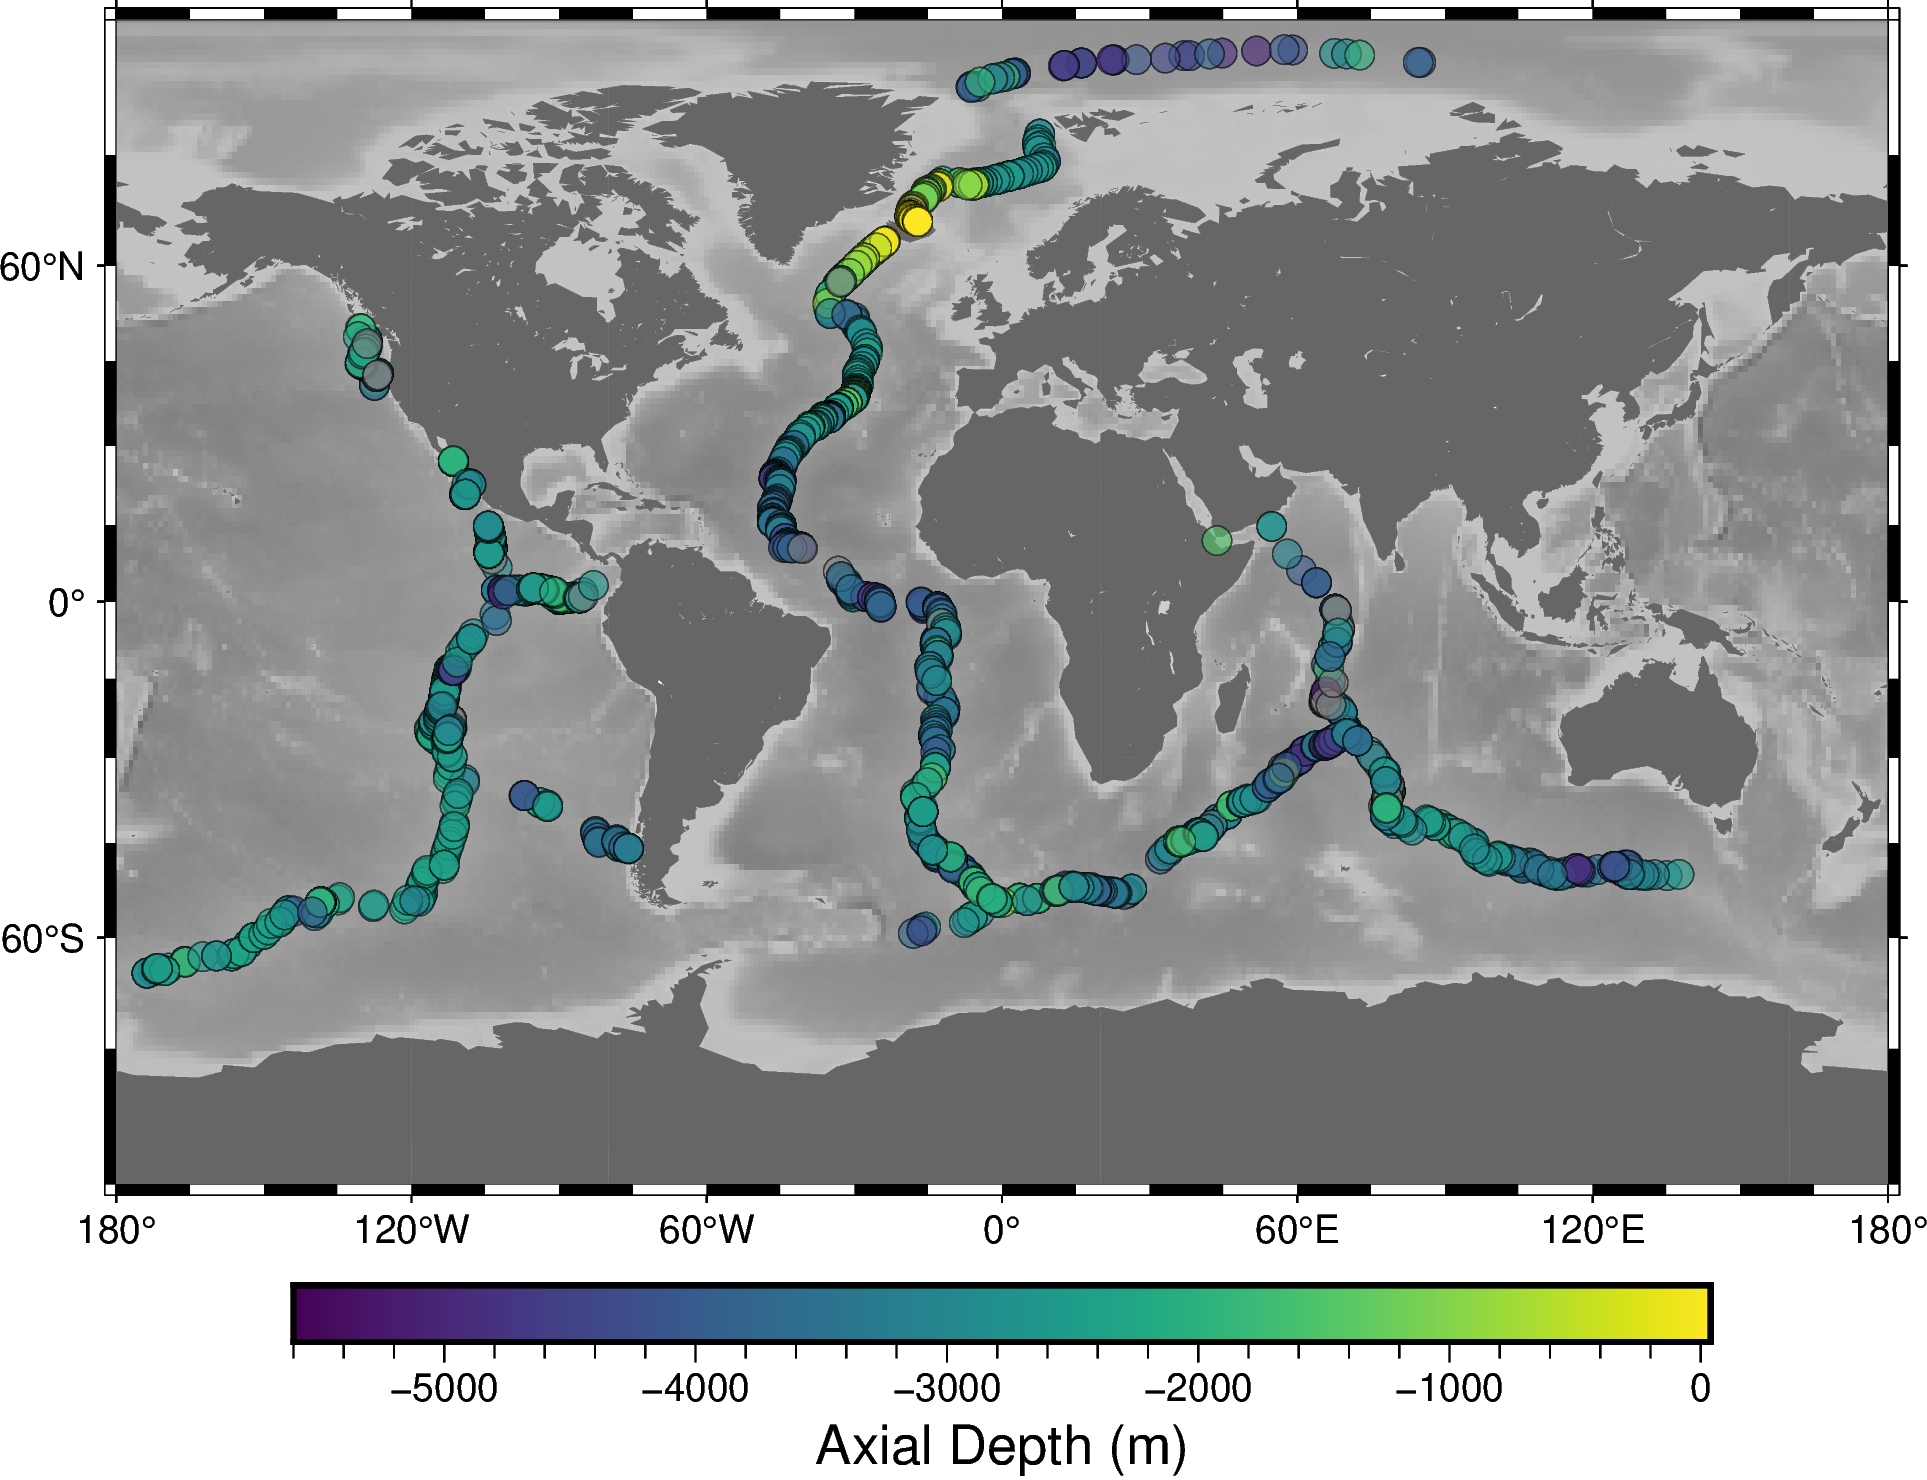

In [8]:
# I will walk through a PyGMT figure plotting example below. There are plotting particularities that you do not need to worry about. 
# Focus on the fig.plot portion of plotting code, where plotting the scatter points happens. Make sure you understand what is being plotted there. 

grid = pygmt.datasets.load_earth_relief() # loads earth relief
fig = pygmt.Figure() # defines a figure
fig.subplot(nrows = 1, ncols = 1, figsize = ('20c', '15c')) # defines a plot with size
# Plot the earth relief grid on Cylindrical Stereographic projection, masking
fig.basemap(region="g", projection="Cyl_stere/0/-20/15c", frame=True) # creates the base projection map
fig.grdimage(grid=grid, cmap="gray", transparency=40,) # sets the background depiction of bathymetry
fig.coast(land="#666666") # creates continents 

pygmt.makecpt(cmap="viridis", series=[df.Elevation.min(), df.Elevation.max()]) # defines a colormap with color ranging from minimum to maximum bathymetric elevation 
fig.plot(x=df.Longitude, y=df.Latitude, style="c0.25c", # plot x and y, with color of scatter points showing bathymetric elevation 
    color=df.Elevation,
    cmap=True, pen='black', transparency=40,)
fig.colorbar(frame='af+l"Axial Depth (m)"') # create colorbar 
fig.show()

##### A. Can you identify the Mid-Atlantic Ridge and the East Pacific Rise on your graph? These are two of the best studied mid-ocean ridges. 

Answer here:

##### B. What plotted on the x-axis and y-axis? What do the colors of the scatter points represent? 



Answer here: 

##### 3. Let's visualize $SiO_2$ (y-axis) vs. $MgO$ (x-axis), and $FeO$ (y-axis) vs. $MgO$ (x-axis). We can do so quite easily by using the matplotlib package, which we imported at the start. I show below how you plot $SiO_2$ vs. $MgO$, as an example. 

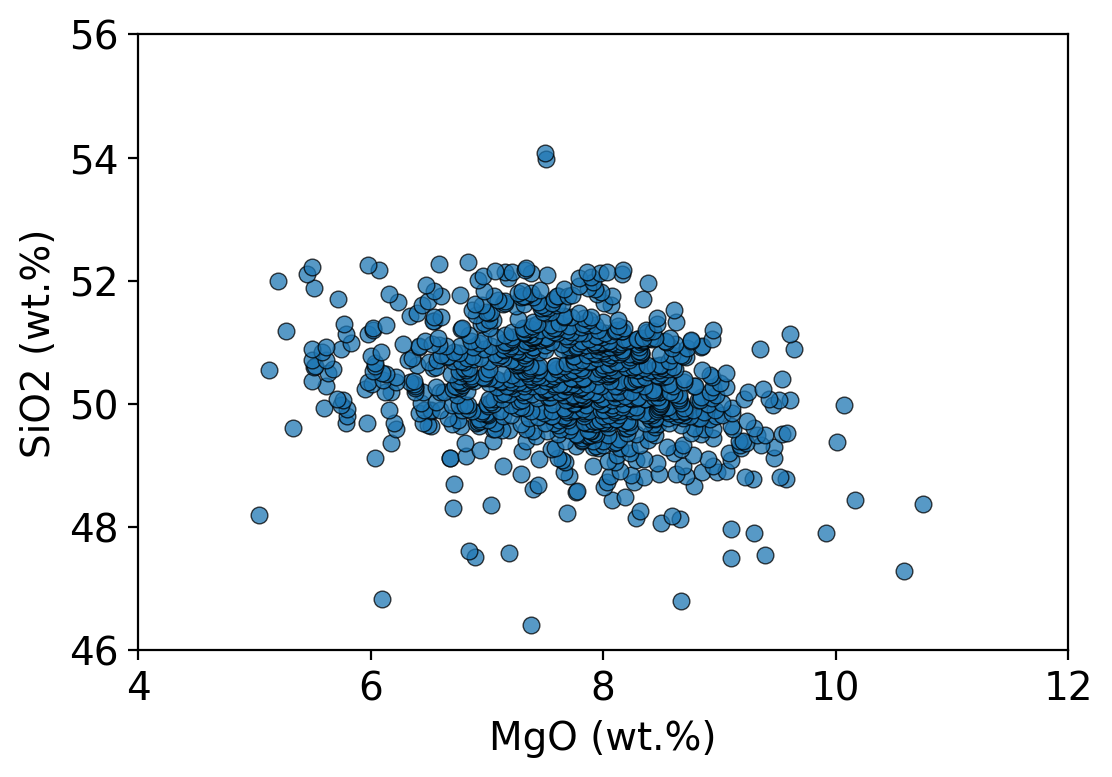

In [9]:
plt.figure(figsize=(6, 4)) # define figure and figure size, width vs. height
plt.scatter(df.MgO, df.SiO2, edgecolor='k', linewidth = 0.5, alpha=0.75) # scatter (x, y), edgecolor and linewidth define the scatter outlines, alpha defines transparency. 
plt.xlabel('MgO (wt.%)') # label x-axis
plt.ylabel('SiO2 (wt.%)') # label y-axis
plt.xlim([4, 12]) # set x-axis range
plt.ylim([46, 56]) # set y-axis range. 
plt.show()

##### A. Please make the corresponding plot for $FeO$ vs. $MgO$. 

In [10]:
# Make the plot for FeO vs. MgO

##### B. According to your plot and ignoring outlying samples, what is the range in $SiO_2$ of the main cluster of MORB glasses? Is this variation real?--i.e., is it greater than the ~1 wt.% error for $SiO_2$ in volcanic glasses? 


Answer here: 


##### C. Ignoring outlying samples, what seems to be the range of MgO for the global MORB dataset? Is this variation real?--i.e., is it above or below the ~0.5 wt.% error for $MgO$ analysis in volcanic glasses?

Answer here: 

##### D. What is the range in $FeO$, and is the variation real if there is a 0.5 wt.% error for $FeO$ in volcanic glasses? 

Answer here: 

##### D. What is the most likely cause for most of the geochemical variation in $MgO$ and $SiO_2$? (Hint: think of processes involving low-$Si$ and high-$Mg$ solids.)

Answer here: 

##### E. In terms of $MgO$ content, which glass compositions will be more closely related to their original mantle sources?--low $MgO$, medium $MgO$, or high $MgO$?


Answer here: 

##### F. For the keen beans in the class, learn how to plot $SiO_2$ (y-axis) vs. $MgO$ (x-axis), and $FeO$ (y-axis) vs. $MgO$ (x-axis) but now with the scatter points colored by axial depth. 


In [11]:
# Plot SiO2 (y-axis) vs. MgO (x-axis), and FeO (y-axis) vs. MgO (x-axis) but now with the scatter points colored by axial depth. 


##### 4. It will be of interest now to focus on the geochemical variation among the more primitive MORB liquids, but to do this, we need to find a way to correct for the effects of fractionation. Well, we're in luck! A method of fractionation correction has been developed by [(Klein and Langmuir, 1987)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/JB092iB08p08089) which is based on the observation that low-pressure fractionation of a primitive basaltic liquid within an individual volcanic suite (or at a specific location) results in a more-or-less linear array ("liquid lines of descent") on major-element variation diagrams, at least over certain ranges of MgO. Because their fractionating mineral assemblages are similar, the slopes of these liquid lines of descent for different igneous suites (or locations) are more or less sub-parallel to one another. If the slope of these linear variation arrays is known, and they are, it should be feasible to determine "calculated" values of a particular element-oxide (from different suites or locations) at a constant value of $MgO$. We are thus able to compare the variation in $Na$, rather than the variation due to varying melt proportions. To approximate a fairly primitive basaltic liquid composition, a value of $MgO$ = 8 wt.% is arbitrarily chosen for the value at which the "calculated" element-oxides are compared. You will perform this correction now. 

Create additional dataframe columns to define the following variables: 

$\frac{CaO}{Al_2O_3} = \frac{CaO (wt.\%)}{Al_2O_3 (wt.\%)}$

$Fe_{8.0} = FeO_t + 1.664*MgO - 13.313$

$Na_{8.0} = Na_2O + 0.373*MgO - 2.98$

The equations for $Fe_{8.0}$ and $Na_{8.0}$ are both from [(Klein and Langmuir, 1987)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/JB092iB08p08089). $\frac{CaO}{Al_2O_3}$ does not change much with fractionation, so does not need to be corrected. I show below how to create a new column for $\frac{CaO}{Al_2O_3}$, but please do the same for $Fe_{8.0}$ and $Na_{8.0}$. There is a simplicity to the dataframe structure that allows you to apply the same mathematical operation to all rows. 


In [12]:
# For simple mathematical operations, addition uses '+', subtraction uses'-', multiplication uses '*', division uses '/'. 

df['CaO_Al2O3'] = df['CaO'] / df['Al2O3'] # I create the new column of the dataframe called 'CaO_Al2O3' by placing that variable in square braces, then define how to perform division. 
df['CaO_Al2O3']


0       0.699501
1       0.645016
2            NaN
3       0.716073
4       0.617239
          ...   
2461         NaN
2462         NaN
2463         NaN
2464         NaN
2465         NaN
Name: CaO_Al2O3, Length: 2466, dtype: float64

In [13]:
# Calculate $Fe_{8.0}$ and $Na_{8.0}$ here. 
 
df['Na8'] = df['Na2O'] + 0.373*df['MgO'] - 2.98

# Do the calculation for $Fe_{8.0}$ 



##### 5. $Fe_{8.0}$, $Na_{8.0}$, and $\frac{CaO}{Al_2O_3}$ are not meaningful for all values of $MgO$. Select the range of 5.0-8.5 wt.% $MgO$, for which this calculation is valid and meaningful. Plot $Fe_{8.0}$, $Na_{8.0}$, and $\frac{CaO}{Al_2O_3}$ (y-axis) versus bathymetric elevation for values of MgO in this range. I will demonstrate how to select a portion of your dataframe for which this is true. 

In [14]:
# I select a portion of the dataframe where MgO is between 5.0 and 8.5 wt.%. 

df_lim = df[df.MgO.between(5.0, 8.5)]

df_lim

,Sample_ID,Material,SiO2,TiO2,Al2O3,FeO,Cr2O3,MnO,MgO,CaO,...,Tectonic,Rock,Expedition,Reference,Method,Sample_ID.1,Material.1,Elevation_km,CaO_Al2O3,Na8
0,SHK0462-006,WR,45.31,1.34,16.04,10.91,NaN,0.16,6.44,11.22,...,FRACTURE_ZONE,"IVM, igneous:volcanic:mafic",SHINKAI 6500 D462,"COOGAN, 2004",NaN,SHK0462-006,WR,NaN,0.699501,4.26212
1,HLY0102-005-002,GL,46.42,2.85,15.55,12.68,NaN,NaN,7.38,10.03,...,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",HEALY 0102,"MICHAEL, 2003; GOLDSTEIN, 2008",DCP; TIMS; EMP; ICPMS,HLY0102-005-002,GL,-4.0985,0.645016,2.59274
3,JCR0031-ROPOS-434-1A,WR,46.84,1.68,15.99,10.74,NaN,0.16,6.10,11.45,...,FRACTURE_ZONE,"IVM, igneous:volcanic:mafic",JR31,"COOGAN, 2004",NaN,JCR0031-ROPOS-434-1A,WR,NaN,0.716073,2.66530
6,MELPROT-5-020-A,WR,47.52,0.52,18.34,7.51,NaN,0.14,6.90,10.68,...,FRACTURE_ZONE,"IVM, igneous:volcanic:mafic",PROTEA-5,"MAHONEY, 1992",NaN,MELPROT-5-020-A,WR,-2.2500,0.582334,2.16370
8,EWI0004-017-004,GL,47.58,2.00,16.83,9.39,NaN,0.17,7.19,10.99,...,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",EW0004,"CUSHMAN, 2004; GRAHAM, 2007",EMP; MS,EWI0004-017-004,GL,-1.7620,0.653001,3.00187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,DUF0057-006-006,WR,NaN,NaN,NaN,NaN,NaN,NaN,7.94,NaN,...,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",MD57,"ESCRIG, 2004",NaN,DUF0057-006-006,WR,NaN,NaN,NaN
2451,DUF0057-013-m,WR,NaN,NaN,NaN,NaN,NaN,NaN,7.27,NaN,...,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",MD57,"ESCRIG, 2004",NaN,DUF0057-013-m,WR,-3.2000,NaN,NaN
2452,DUF0057-0014-001,WR,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN,...,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",MD57,"ESCRIG, 2004",NaN,DUF0057-0014-001,WR,NaN,NaN,NaN
2453,DUF0057-014-004,WR,NaN,NaN,NaN,NaN,NaN,NaN,7.82,NaN,...,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",MD57,"ESCRIG, 2004",NaN,DUF0057-014-004,WR,NaN,NaN,NaN


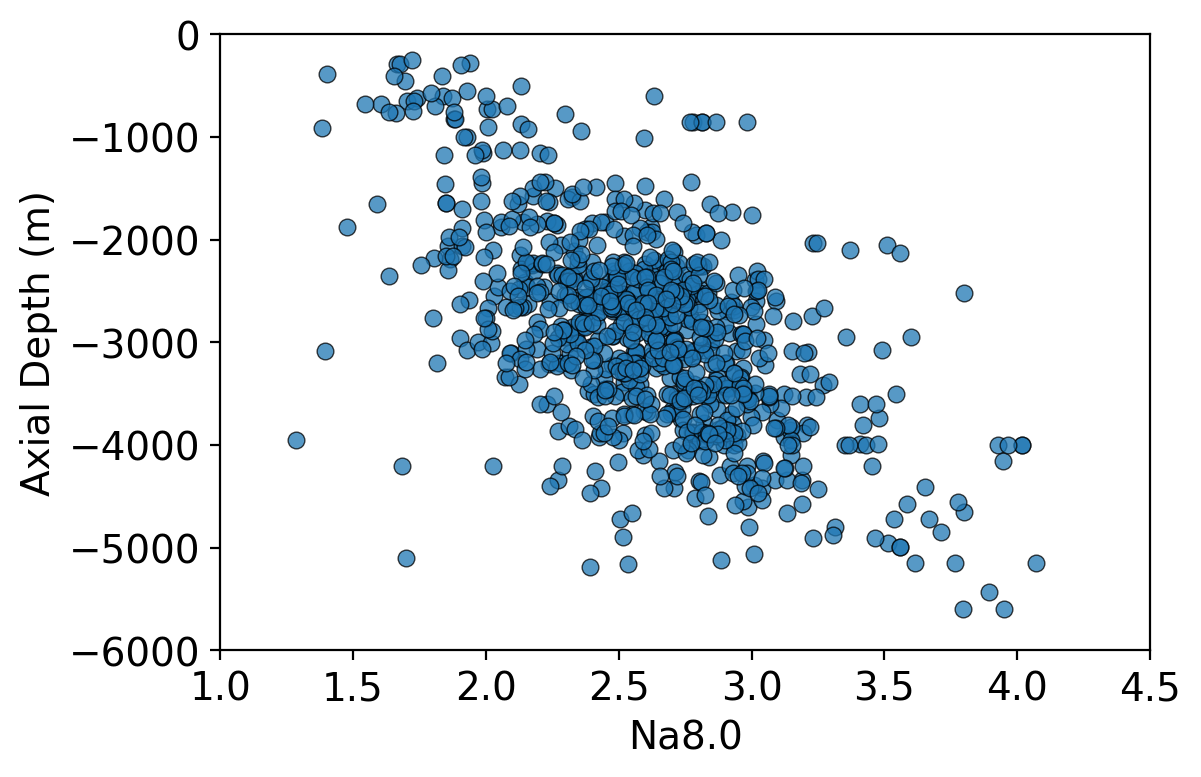

In [15]:
# Plot the figures here. I'll show the one for Na8.0, but please make the two other figures. 

plt.figure(figsize=(6, 4)) # define figure and figure size, width vs. height
plt.scatter(df.Na8, df.Elevation, edgecolor='k', linewidth = 0.5, alpha=0.75) # scatter (x, y), edgecolor and linewidth define the scatter outlines, alpha defines transparency. 
plt.xlabel('Na8.0') # label x-axis
plt.ylabel('Axial Depth (m)') # label y-axis
plt.xlim([1, 4.5]) # set x-axis range
plt.ylim([-6000, 0]) # set y-axis range. 
plt.show()

In [16]:
# Plot Elevation (km) Fe8.0 





In [17]:
# Plot Elevation (km) vs. CaO/Al2O3





##### 6. Do MORBs display global geochemical variations beyond what should be expected from fractionation? What are the magnitude of those variations? Are they in excess of the analytical uncertainties (~0.5 wt.%)?



Answer here: 

##### 7. Are the axial traces of the world's mid-ocean ridges all at the same depth below sea level?



Answer here: 

##### 8. Formulate a hypothesis relating the elevation of a mid-ocean ridge segment and rates of melting in the underlying mantle source.



Answer here: 

##### 9. If Na is largely an incompatible element (meaning it does not want to remain in the crystal and wants to enter melt) during partial melting of the mantle, does your plot of $Na_{8.0}$ vs. elevation support your hypothesis in question 8 above?



Answer here: 

##### 10. If Fe is largely an incompatible element during partial melting of the mantle, does your plot of $Fe_{8.0}$ vs. elevation support your hypothesis in question 8 above?

Answer here:

##### 11. $\frac{CaO}{Al_2O_3}$ increases (in the melt) with increasing amounts of melting as long as clinopyroxene is retained in the source rock. Does this observation support your hypothesis in question 8 above?

Answer here:

##### 12. We can now look to paired studies of geophysics and geochemistry to further understand this problem. Shear wave velocities ($V_s$) are proxies for mantle potential temperatures, representing the temperature the mantle would have at the surface if it ascended along an adiabat without undergoing melting. This was a concept proposed by [McKenzie & Bickle, 1988](https://academic.oup.com/petrology/article-abstract/29/3/625/1432023) to compare mantle temperatures at different localities. Look at the figure below from the [Dalton et al., 2014](https://www.science.org/doi/full/10.1126/science.1249466?casa_token=UxKZ9f8aOVUAAAAA%3A0MvoZnwoItZMA1wm0VhST88T-BCAX6ghGdl3h7OwWl2ZluXh2SKL1ek_409iN7HUa2btCIudbtfqXw) study. $Na_{8.0}$ is replaced by $Na_{90}$, which similarly represents a primitive basaltic liquid, but instead with $Fo$=90 mol.%. Please interpret the physical meaning of this figure. What seismic speeds and potential temperatures do you find with low sodium and high sodium content?

![daltonetal2014_vs](/figures/daltonetal2014_vs.png)


##### 13. Finally, let's put all of this together. The [Dalton et al., 2014](https://www.science.org/doi/full/10.1126/science.1249466?casa_token=UxKZ9f8aOVUAAAAA%3A0MvoZnwoItZMA1wm0VhST88T-BCAX6ghGdl3h7OwWl2ZluXh2SKL1ek_409iN7HUa2btCIudbtfqXw) study further analyze axial depths and their relationship to potential temperature (or really, shear wave velocity, $V_s$). We plotted the MORB samples and their corresponding axial depths with PyGMT above. Do the potential temperatures pair with depth? If so, why is this? (Hint: Think about crustal thicknesses, isostasy, Archimedes' principal -- how might these explain the observable)

![daltonetal2014_ridge](/figures/daltonetal2014_ridge.png)


### IV. Conclusion

Congratulations! You have learned some pretty important things about the global geochemical of MORBs, and what their geochemical variation may be telling us about physical conditions within the upper mantle. Of course, there are many additional and complicating factors which we haven't considered during this rather simplistic exercise. For example, how do temperature and pressure differences below the mid-ocean ridges control the melting behavior below the mid-ocean ridges? Additionally, we have totally neglected the important role of mantle plumes and hotspots--several of these features are found along the mid-ocean ridges (e.g., Iceland, the Azores, and the Galapagos), and related samples were included in your dataset that you downloaded from PetDB.

While you have only grazed the surface of this complex topic, you have basically duplicated part of the work published by [Klein and Langmuir, 1987](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/JB092iB08p08089) in their classic work on mid-ocean ridge geochemistry, but using a much, much larger dataset!
